# 1. 单层感知机

定义式：

$$
    y = w_1x_1 + w_2x_2 + ... + w_nx_n + b
$$

如果只考虑两个因素，即输入数据维度是2，感知机函数为$y = w_1x_1 + w_2x_2 + b$，在三维坐标系里是一个平面$w_1x_1 + w_2x_2 - y + b = 0$，只能将三维空间划分为两个空间，所以输出的结果只有两类。同样的，对于更高维度的空间，感知机函数所能做的也仅仅时将其划分为两个空间，感知机函数所对应的平面
$w_1x_1 + w_2x_2 + ... + w_nx_n - y + b = 0$称为**超平面**。

感知机的缺陷：**无法解决异或问题**

## [实验一] 实现单隐藏层为256的多层感知机

epoch: 1, loss: 0.6910132884979248, accuracy: 0.73671875
epoch: 2, loss: 0.5549683570861816, accuracy: 0.80517578125
epoch: 3, loss: 0.5547346591949462, accuracy: 0.8021484375
epoch: 4, loss: 0.4781937122344971, accuracy: 0.8296875
epoch: 5, loss: 0.46979646682739257, accuracy: 0.833984375
epoch: 6, loss: 0.4715888500213623, accuracy: 0.83291015625
epoch: 7, loss: 0.44906301498413087, accuracy: 0.838671875
epoch: 8, loss: 0.5003121852874756, accuracy: 0.81904296875
epoch: 9, loss: 0.4304527759552002, accuracy: 0.84521484375
epoch: 10, loss: 0.45417037010192873, accuracy: 0.83759765625
epoch: 11, loss: 0.4164729118347168, accuracy: 0.853125
epoch: 12, loss: 0.4026285171508789, accuracy: 0.85419921875
epoch: 13, loss: 0.50434889793396, accuracy: 0.81484375
epoch: 14, loss: 0.4217700481414795, accuracy: 0.84365234375
epoch: 15, loss: 0.415385103225708, accuracy: 0.84541015625
epoch: 16, loss: 0.38382141590118407, accuracy: 0.8625
epoch: 17, loss: 0.39549458026885986, accuracy: 0.858886718

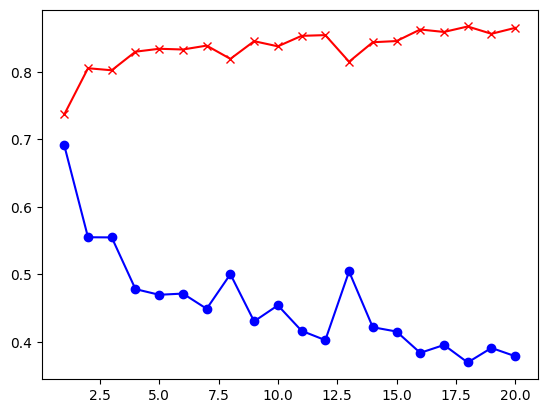

In [7]:
import torch
from torch import nn
from d2l import torch as d2l
import matplotlib.pyplot as plt
from MyModule.Utils import accuracy_Fmnist

batch_size = 256
train_dataLoader, test_dataLoader = d2l.load_data_fashion_mnist(batch_size)

nums_input = 784
nums_hidden = 256
nums_output = 10

w1 = nn.Parameter(      # 将torch的tensor包装成参数，以便优化器能够识别并更新这些参数
    torch.randn(size=(nums_input, nums_hidden)) * 0.01
)

b1 = nn.Parameter(
   torch.zeros(nums_hidden)
)

w2 = nn.Parameter(
    torch.randn(size=(nums_hidden, nums_output)) * 0.01
)

b2 = nn.Parameter(
    torch.zeros(nums_output)
)

# 前向传播
def forward(x):
    x = x.reshape(-1, nums_input)
    x = torch.relu(x@w1 + b1)
    x = x@w2 + b2
    return x

# 损失函数
loss = nn.CrossEntropyLoss()

# 优化器
optimzer = torch.optim.SGD([w1,b1,w2,b2], lr = 0.1)

# 训练
losses = []
accuracies = []
num_epoch = []
epochs = 20
for epoch in range(epochs):
    train_iter = iter(train_dataLoader)
    for x,y in train_iter:
        l = loss(forward(x), y)
        optimzer.zero_grad()
        l.backward()
        optimzer.step()

    # 求测试集loss
    test_iter = iter(test_dataLoader)
    total_loss = 0
    total_accuracy = 0
    for x,y in test_iter:
        output = forward(x)
        l = loss(output, y)
        total_loss += l
        total_accuracy += accuracy_Fmnist(output, y)

    epoch_loss = total_loss.item() / len(test_iter)
    epoch_accuracy = total_accuracy.item() / len(test_iter)
    print(f'epoch: {epoch + 1}, loss: {epoch_loss}, accuracy: {epoch_accuracy}')
    num_epoch.append(epoch+1)
    losses.append(epoch_loss)
    accuracies.append(epoch_accuracy)

plt.figure()
plt.plot(num_epoch, losses, color='blue', label='Loss', marker='o')
plt.plot(num_epoch, accuracies, color='red', label='Accuracy', marker='x')